### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df = pd.read_csv("/home/jupyter/BlackFridaySales.csv")

### Exploratory Data Analysis

#### 1. Descriptive analysis

In [3]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [4]:
# Checking for Null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [5]:
# Checking the counts of unique values
round((df['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

Age
26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: proportion, dtype: object

In [6]:
# Checking the counts of unique values
round((df['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

Stay_In_Current_City_Years
1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: proportion, dtype: object

#### 2. Univariate Analysis

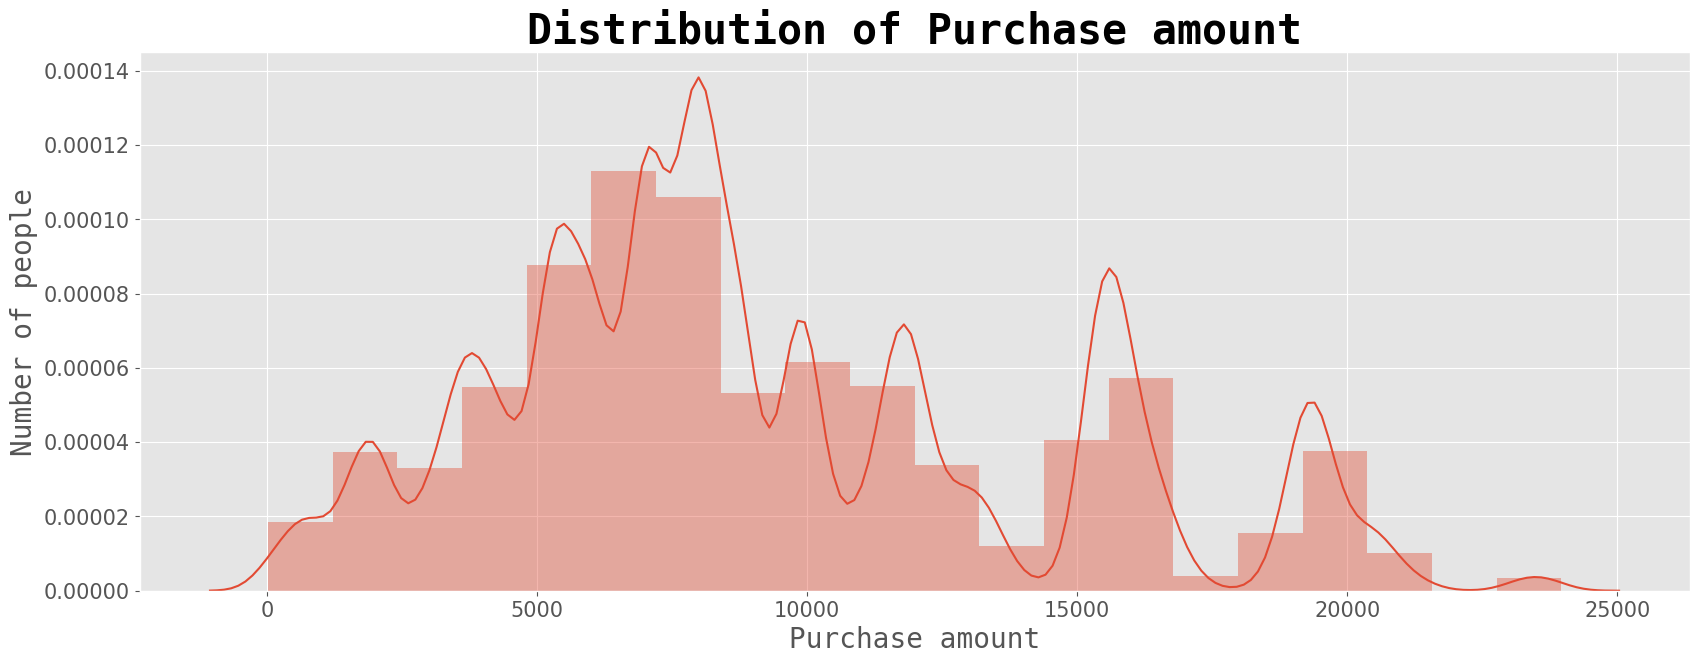

In [7]:
# Creating a distplot for dependent feature 'Purchase'
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(df['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

Text(0.5, 0, 'Gender')

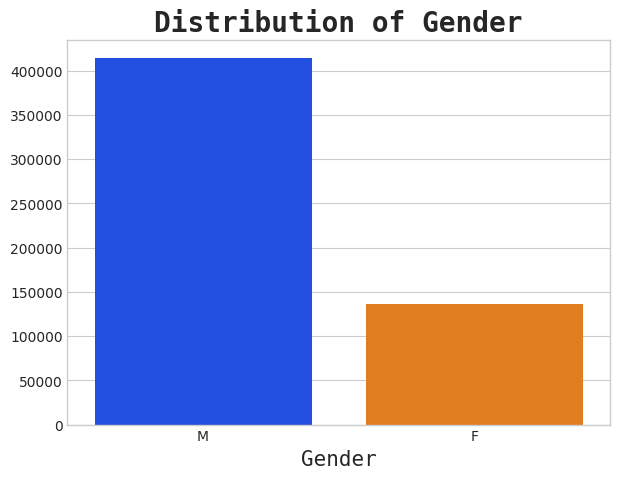

In [8]:
# Creating a barplot for 'Gender'
gen = df['Gender'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(x=gen.index, y=gen.values, palette = 'bright') # Change here
plt.title('Distribution of Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})

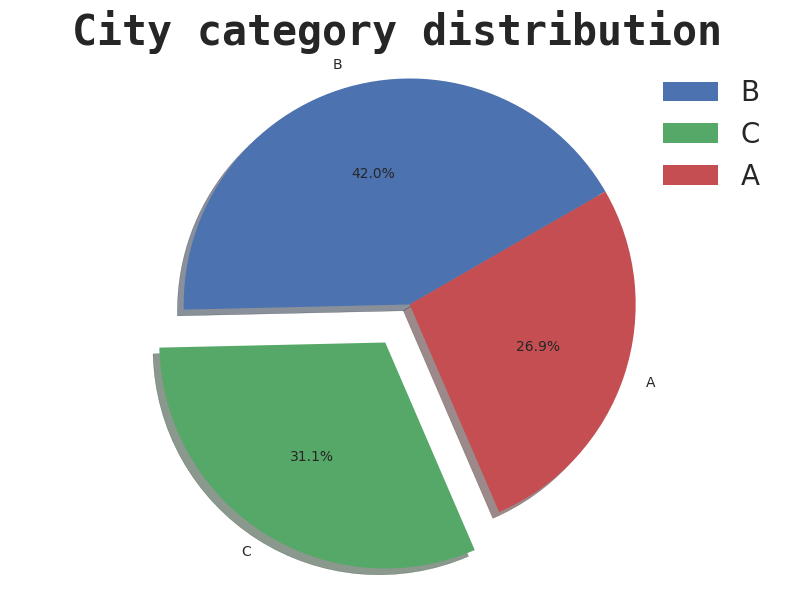

In [9]:
# Creating a pie chart for 'City Category'
city = df['City_Category'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize = (10, 7))
plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.20, 0), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

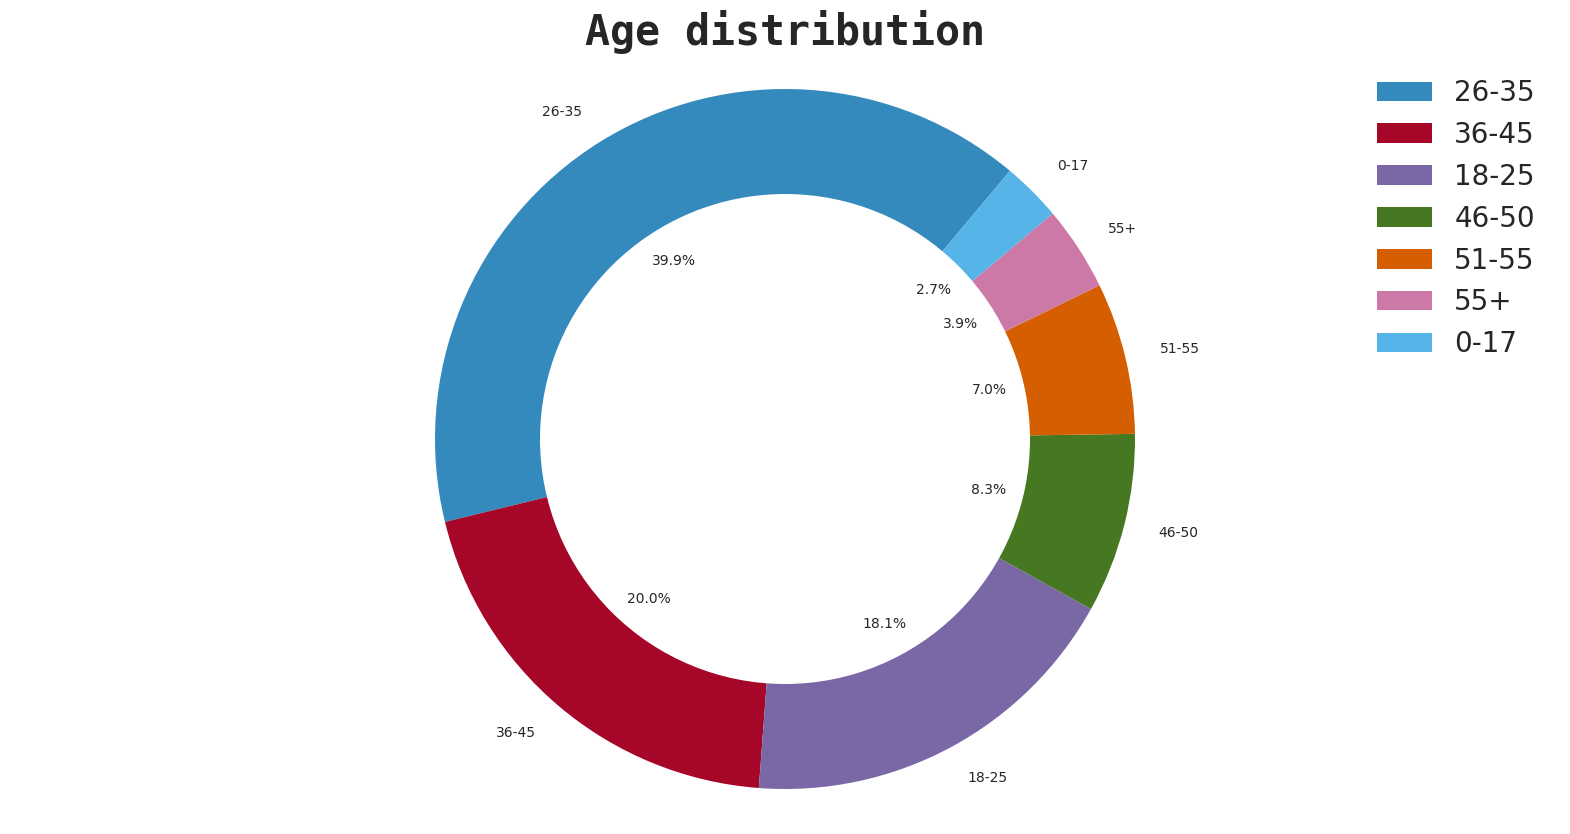

In [10]:
# Creating a donut chart for 'Age'
age = df['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()

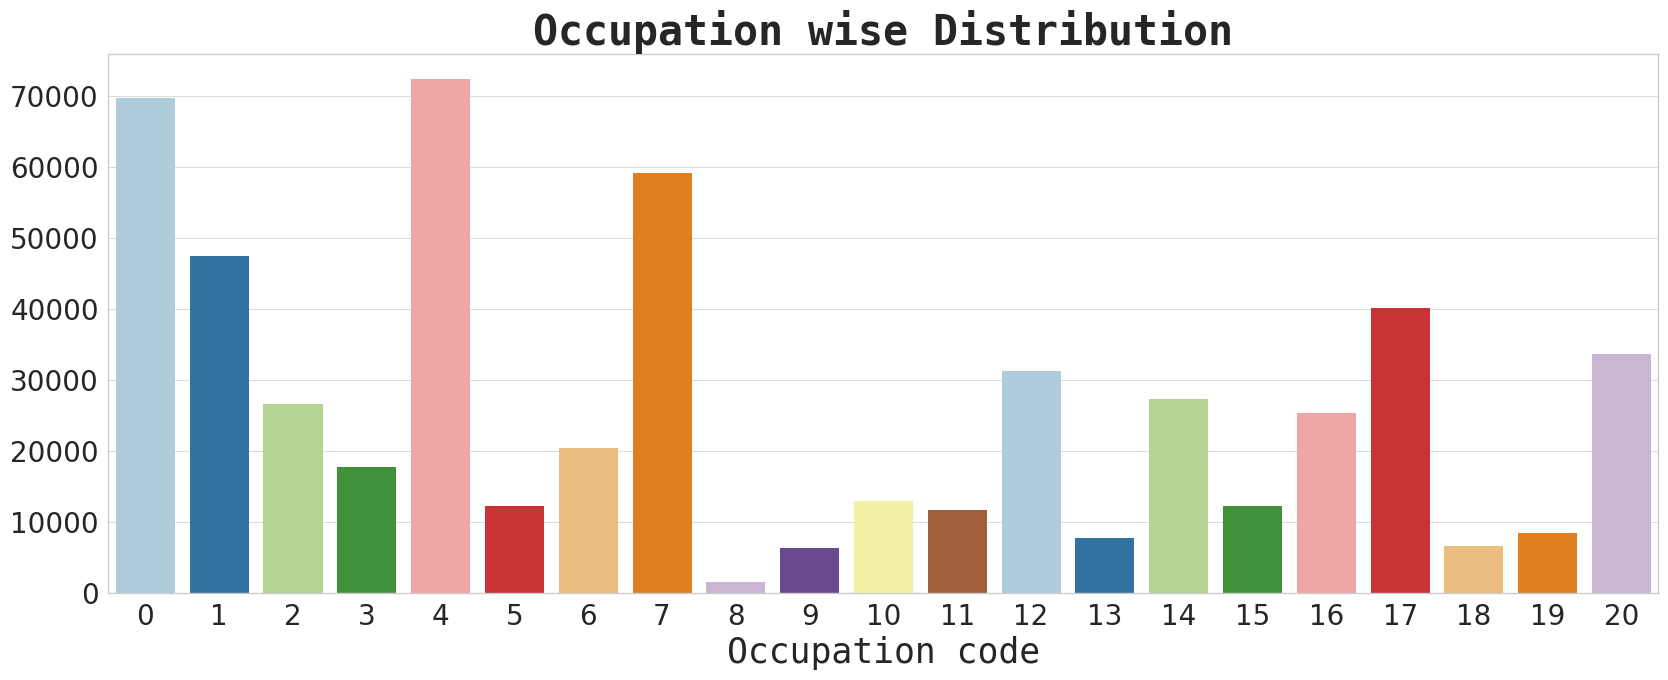

In [11]:
# Creating a barplot for 'Occupation'
occupation = df['Occupation'].value_counts()

plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
sns.barplot(x=occupation.index, y=occupation.values, palette = 'Paired')  # Change here
plt.title('Occupation wise Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})

plt.tick_params(labelsize = 20)
plt.show()

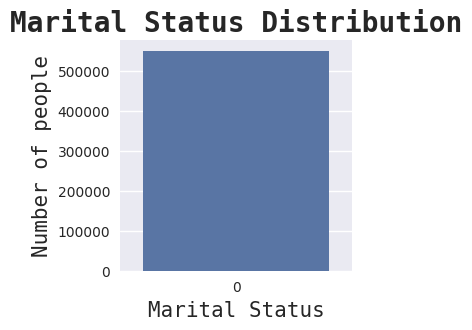

In [12]:
# Creating a countplot for 'Marital Status'
plt.style.use('seaborn')
plt.figure(figsize = (3, 3))
sns.countplot(df['Marital_Status'])
plt.title('Marital Status Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

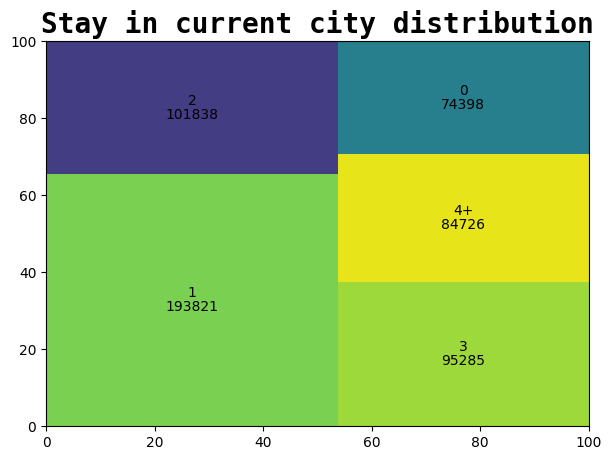

In [13]:
#Creating a Treemap for 'Stay_In_Current_City_Years'
stay = df['Stay_In_Current_City_Years'].value_counts()

import squarify
plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = stay.values, label = stay.index, value = stay.values)
plt.title('Stay in current city distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

#### 3. Bivariate Analysis

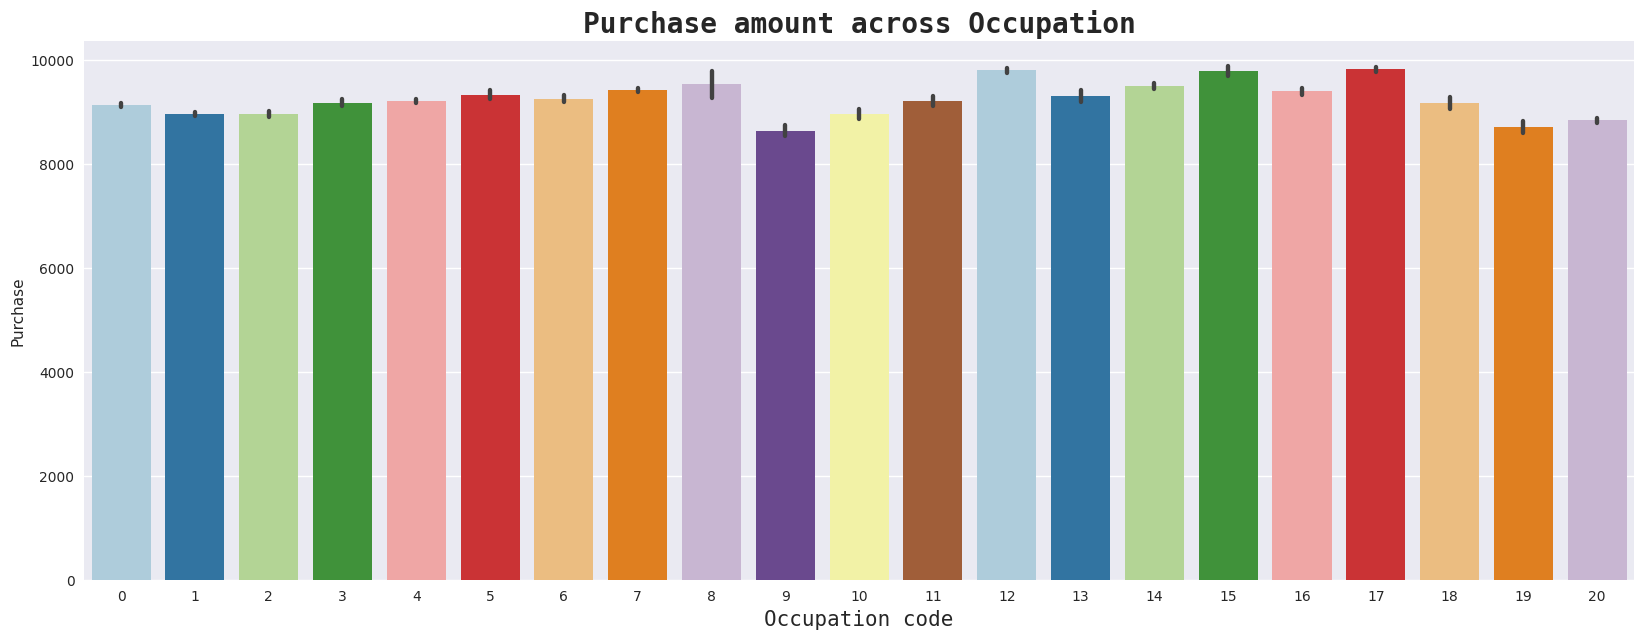

In [14]:
# Creating a barplot of 'Occupation vs Purchase'
plt.figure(figsize = (20, 7))
plt.style.use('seaborn')
sns.barplot(x='Occupation', y='Purchase', data=df, palette='Paired')  # Changes here
plt.title('Purchase amount across Occupation', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.show()

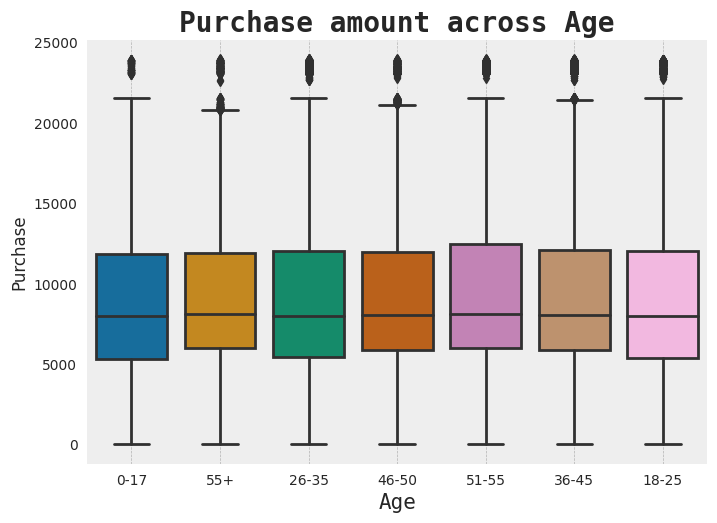

In [15]:
# Creating a boxplot of 'Age vs Purchase'
plt.style.use('bmh')
sns.boxplot(x='Age', y='Purchase', data=df, palette='colorblind') # Changes here
plt.title('Purchase amount across Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.grid()
plt.show()

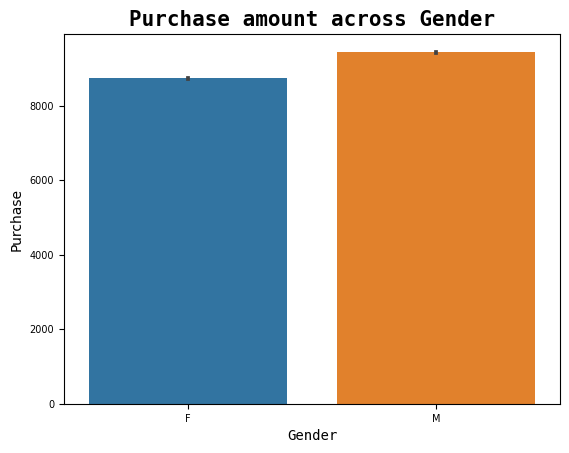

In [16]:
# Creating a barplot of 'Gender vs Purchase'
plt.style.use('default') 
sns.barplot(x='Gender', y='Purchase', data=df) # Changes here
plt.title('Purchase amount across Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})

plt.tick_params(labelsize = 7)

plt.show()

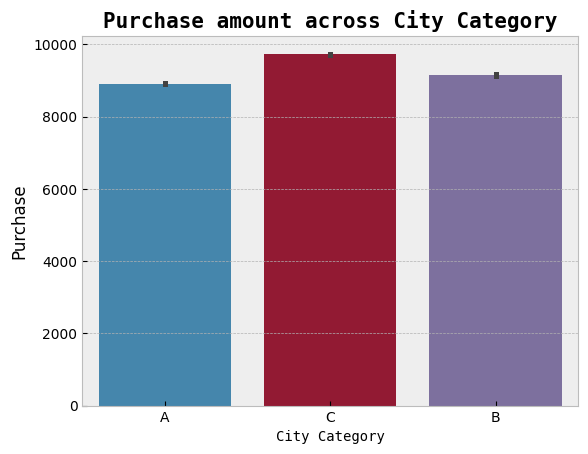

In [17]:
# Creating a barplot of 'City_Category vs Purchase'
plt.style.use('bmh')
sns.barplot(x='City_Category', y='Purchase', data=df)  # Using keyword arguments
plt.title('Purchase amount across City Category', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('City Category', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.show()

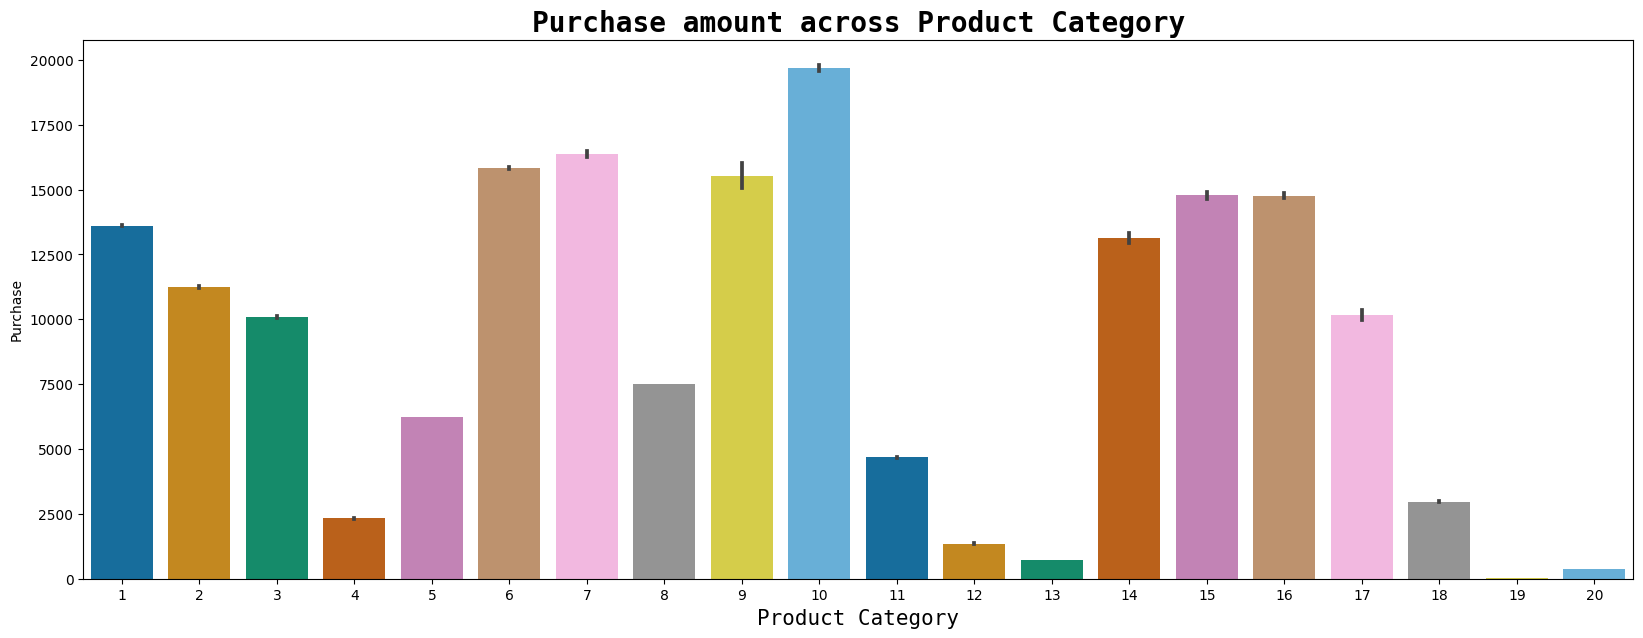

In [18]:
# Creating a barplot of 'Product_Category_1 vs Purchase'
plt.style.use('default')
plt.figure(figsize = (20, 7))
sns.barplot(x='Product_Category_1', y='Purchase', data=df, palette='colorblind')  # Using keyword arguments
plt.title('Purchase amount across Product Category', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Product Category', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.show()

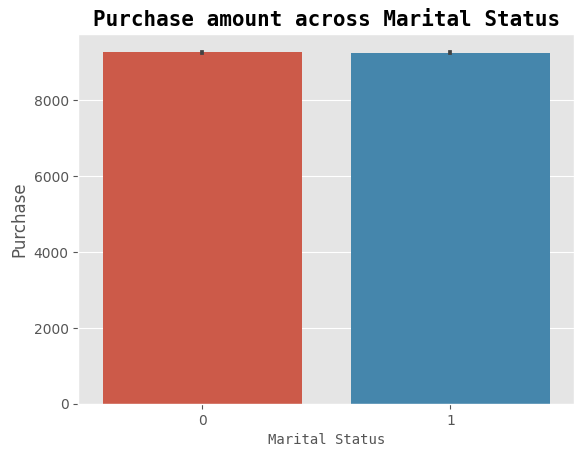

In [19]:
# Creating a barplot of 'Marital Status vs Purchase'
plt.style.use('ggplot')
sns.barplot(x='Marital_Status', y='Purchase', data=df)  # Using keyword arguments
plt.title('Purchase amount across Marital Status', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.show()

#### 4. Multivariate Analysis

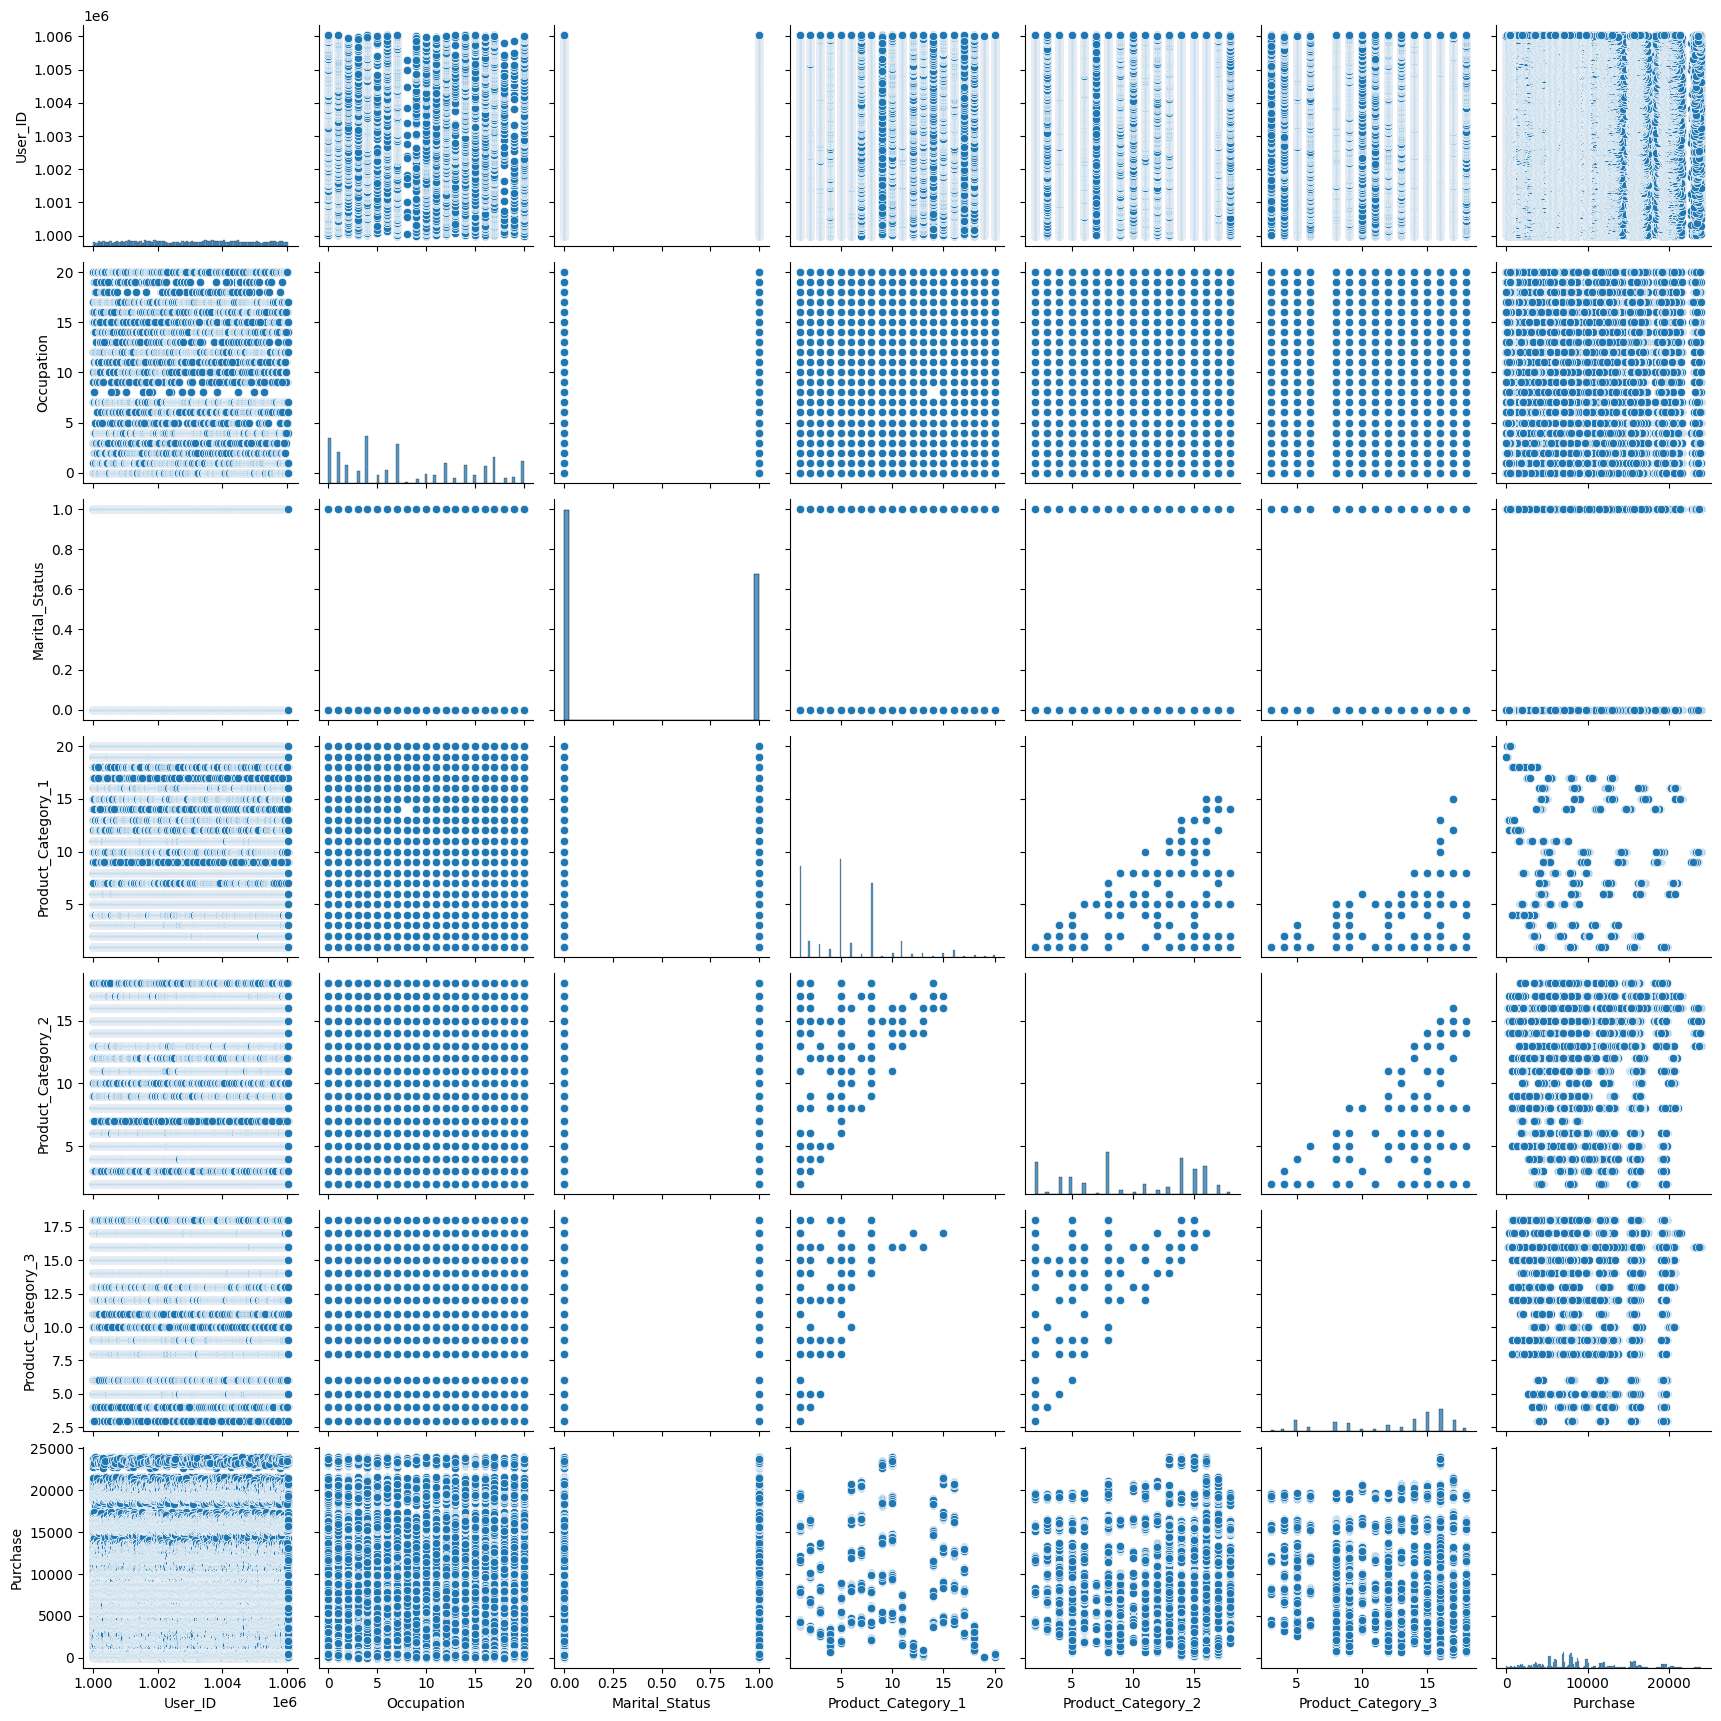

In [20]:
# Creating a Pairplot for all features
plt.style.use('default')
sns.pairplot(df)
plt.show()

### Data Preprocessing

In [21]:
df['Age'] = df['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [22]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

In [23]:
df.drop('Product_Category_3', axis = 1, inplace = True)

In [24]:
df.drop('User_ID', axis = 1, inplace = True)

In [25]:
df.drop('Product_ID', axis = 1, inplace = True)

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])

In [28]:
label_encoder_age = LabelEncoder()
df['Age'] = label_encoder_age.fit_transform(df['Age'])

In [29]:
label_encoder_city = LabelEncoder()
df['City_Category'] = label_encoder_city.fit_transform(df['City_Category'])

In [30]:
df['Product_Category_2'].fillna(df['Product_Category_2'].median(), inplace = True)

In [31]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int')

In [32]:
print(df.columns)

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')


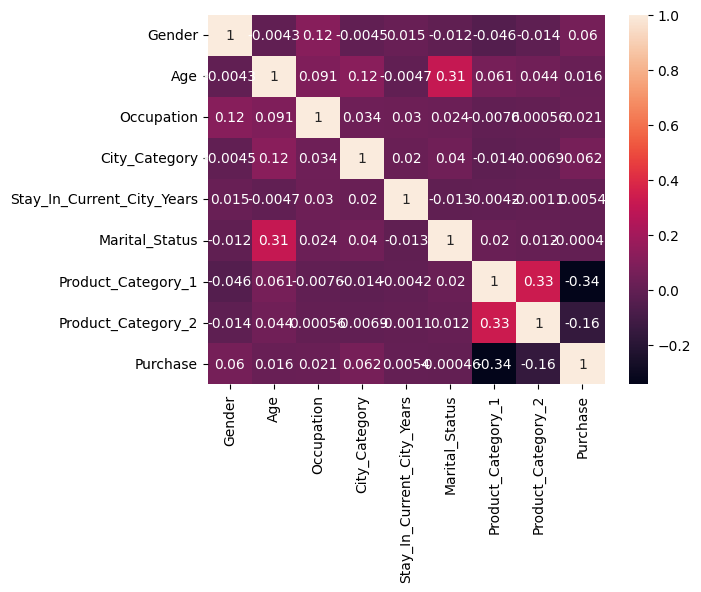

In [33]:
# Creating a heatmap of correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Creating a train test split

In [34]:
from sklearn.model_selection import train_test_split
X = df.drop('Purchase', axis=1)  # Assuming you have a 'target' column you want to predict
y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Feature Selection

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
selector = ExtraTreesRegressor()

In [36]:
selector.fit(X, y)

ExtraTreesRegressor()

In [37]:
feature_imp = selector.feature_importances_

In [38]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 0.49
1 2.12
2 4.98
3 0.75
4 2.59
5 0.62
6 78.67
7 9.79


In [39]:
X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
for col in X.columns:
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [42]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [43]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [44]:
Y_pred_lin_reg = lin_reg.predict(X_test)

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [46]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [47]:
Y_pred_knn = knn.predict(X_test)

In [48]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()

In [49]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [50]:
Y_pred_dec = dec_tree.predict(X_test)

In [51]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()

In [52]:
ran_for.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
Y_pred_ran_for = ran_for.predict(X_test)

In [54]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 42)

In [55]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [56]:
Y_pred_xgb = xgb.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [58]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_lin_reg)))
print("R2 score:", r2_score(y_test, Y_pred_lin_reg))

Linear Regression: 
RMSE: 4697.153578891041
R2 score: 0.12455317730792803


In [59]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_dec)))
print("R2 score:", r2_score(y_test, Y_pred_dec))

Decision tree regression: 
RMSE: 3174.95817780355
R2 score: 0.6000218490996616


In [60]:
print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_ran_for)))
print("R2 score:", r2_score(y_test, Y_pred_ran_for))

Random forest regression: 
RMSE: 3031.3480321589213
R2 score: 0.6353872489235735


In [61]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_xgb)))
print("R2 score:", r2_score(y_test, Y_pred_xgb))

XGB regression: 
RMSE: 2931.737898675064
R2 score: 0.6589559061563257


In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

In [64]:
params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

In [65]:
xgb_tune = XGBRegressor(verbosity = 0, random_state = 42)

In [66]:
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, random_state = 42)

In [67]:
xgb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': ['0.01', '0.05', '0.1',
                                                          '0.25', '0.5', '0.75',
                                                          '1.0'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      20],
                                        'min_child_weight': [45, 46, 48, 50, 52,
                                                             53, 55, 57, 59, 61,
                                                             62, 64, 66, 68,
                                                             70]},
                   random_state=42)

In [68]:
xgb_cv.best_score_

0.6631777327563102

In [69]:
xgb_cv.best_params_

{'min_child_weight': 53,
 'max_depth': 18,
 'learning_rate': '0.5',
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [70]:
xgb_best = XGBRegressor(colsample_bytree = 0.7, gamma = 0.3, learning_rate = 1.0, max_depth = 11, min_child_weight = 66, verbosity = 0, random_state = 42)

In [71]:
xgb_best.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=66, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [72]:
Y_pred_xgb_best = xgb_best.predict(X_test)

In [73]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_xgb_best)))
print("R2 score:", r2_score(y_test, Y_pred_xgb_best))

XGB regression: 
RMSE: 2940.4690371090087
R2 score: 0.656921524289082


In [74]:
import pickle

In [75]:
# Save the model to a file
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xgb_best, file)